<a href="https://colab.research.google.com/github/Amanb1145/ai-projects/blob/main/ImageClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow

In [2]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2025-02-18 17:34:10--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.117.207, 142.250.99.207, 142.250.107.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.117.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   239MB/s    in 0.3s    

2025-02-18 17:34:11 (239 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [3]:
import os
import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

# Set up directories
base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, Model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

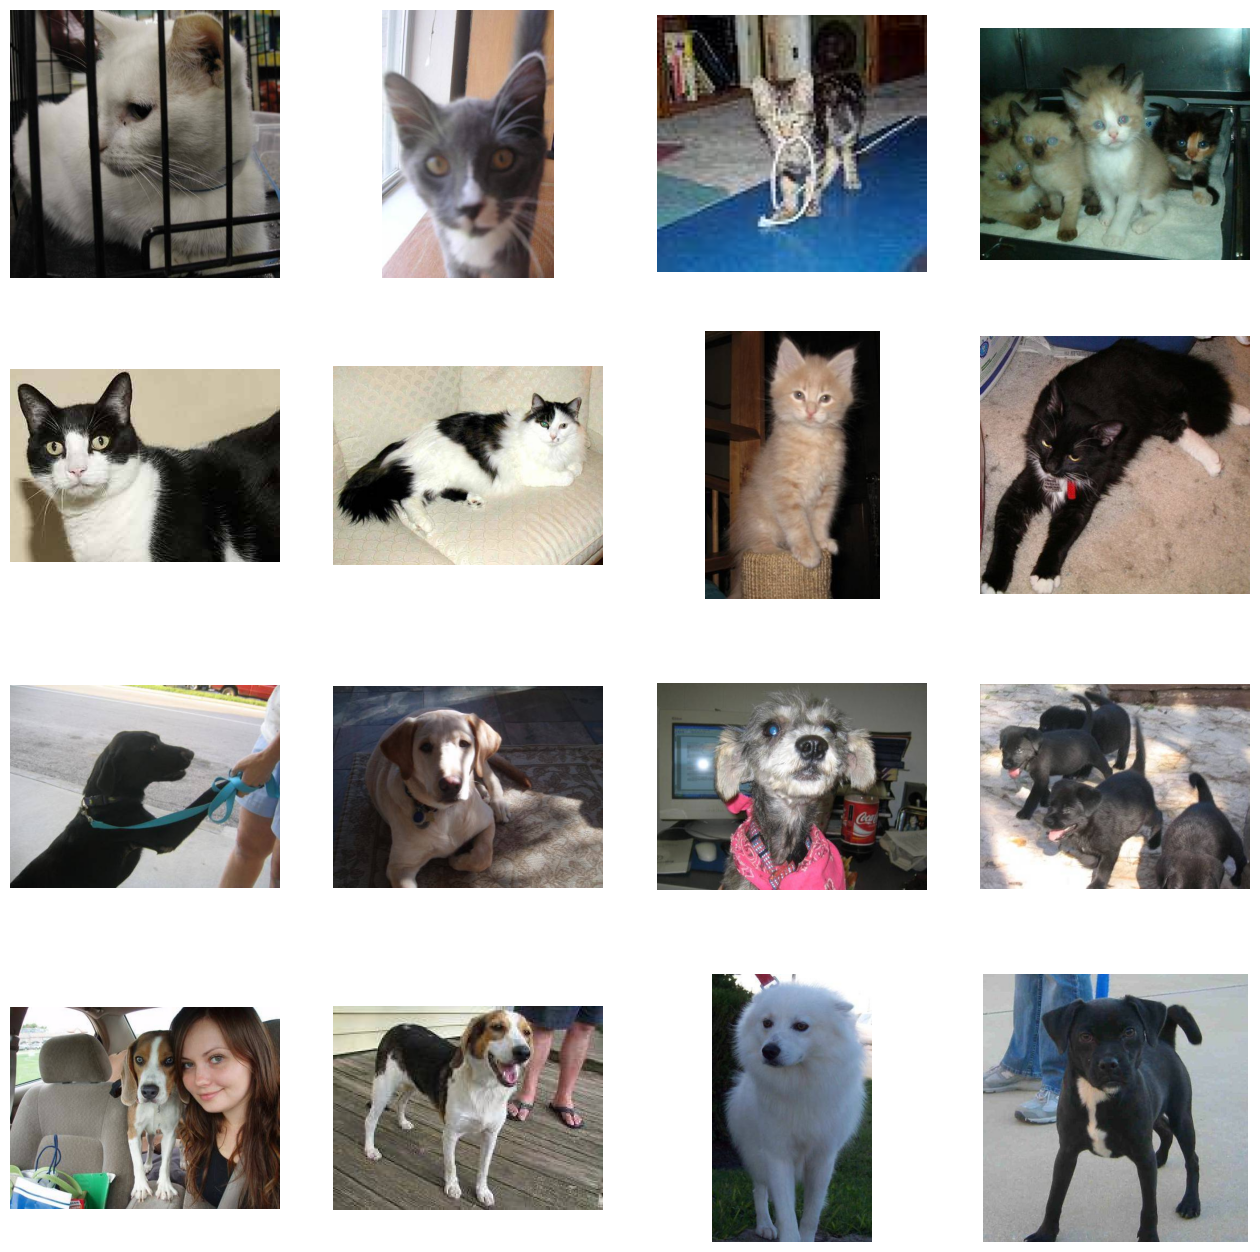

In [5]:
nrows = 4
ncols = 4
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)
pic_index = 8

train_cat_fnames = os.listdir(train_cats_dir)
train_dog_fnames = os.listdir(train_dogs_dir)

next_cat_pix = [os.path.join(train_cats_dir, fname) for fname in train_cat_fnames[:pic_index]]
next_dog_pix = [os.path.join(train_dogs_dir, fname) for fname in train_dog_fnames[:pic_index]]

for i, img_path in enumerate(next_cat_pix + next_dog_pix):
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off')
    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()

In [6]:
train_datagen = ImageDataGenerator(
    rescale=1. / 255.,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1.0 / 255.)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    batch_size=20,
    class_mode='binary',
    target_size=(224, 224)
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    batch_size=20,
    class_mode='binary',
    target_size=(224, 224)
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [7]:
from tensorflow.keras.applications.vgg16 import VGG16

base_model = VGG16(input_shape=(224, 224, 3), include_top=False, weights='imagenet')

# Freeze all layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers
x = layers.Flatten()(base_model.output)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.models.Model(base_model.input, x)

model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['acc'])

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [8]:
vgghist = model.fit(
    train_generator,
    validation_data=validation_generator,
    steps_per_epoch=100,
    epochs=10
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 45s 343ms/step - acc: 0.5999 - loss: 0.8906 - val_acc: 0.8740 - val_loss: 0.3283
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 71s 330ms/step - acc: 0.7428 - loss: 0.4974 - val_acc: 0.8360 - val_loss: 0.3416
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 34s 344ms/step - acc: 0.7767 - loss: 0.4589 - val_acc: 0.8950 - val_loss: 0.2509
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 34s 341ms/step - acc: 0.8217 - loss: 0.4057 - val_acc: 0.8760 - val_loss: 0.2713
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 41s 341ms/step - acc: 0.8491 - loss: 0.3493 - val_acc: 0.9130 - val_loss: 0.2212
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 38s 378ms/step - acc: 0.8370 - loss: 0.3679 - val_acc: 0.9020 - val_loss: 0.2294
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 37s 375ms/step - acc: 0.8410 - loss: 0.3389 - val_acc: 0.8750 - val_loss: 0.2983
Epoch 8/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 38s 342ms/step - acc: 0.8371 - loss: 0.3623 - val_acc: 0.9110 - val_loss: 0.2045
Epoch 9/10
100/100 ━━━━━━━━━━━━━

In [9]:
model.save('/content/vgg16_cats_dogs.h5')

In [10]:
from google.colab import files
files.download('/content/vgg16_cats_dogs.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

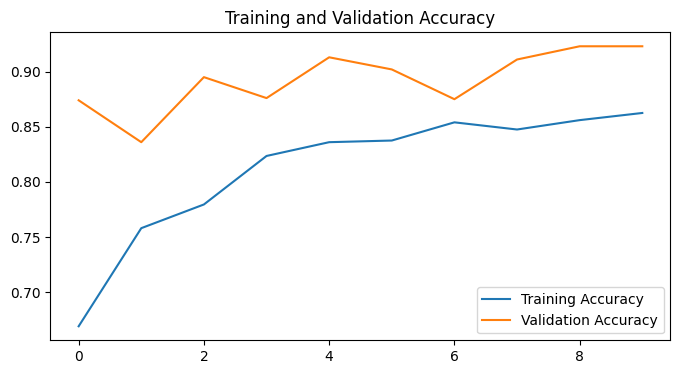

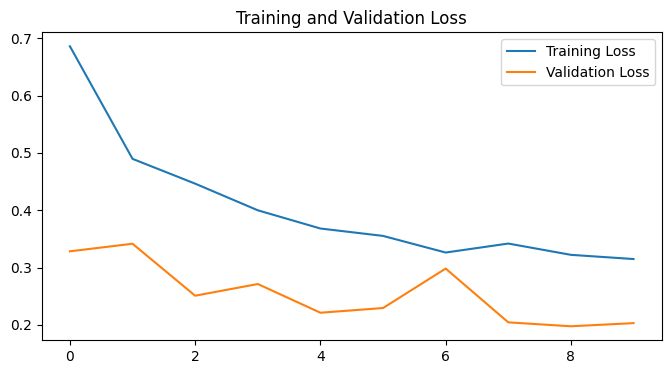

In [11]:
acc = vgghist.history['acc']
val_acc = vgghist.history['val_acc']
loss = vgghist.history['loss']
val_loss = vgghist.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(8, 4))
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.figure(figsize=(8, 4))
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()

Saving aab.jpg to aab (1).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
[1.9150968e-05] lol
Cat


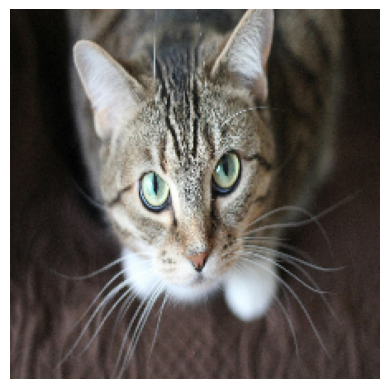

In [21]:
from tensorflow.keras.preprocessing import image
import numpy as np

uploaded = files.upload()
for filename in uploaded.keys():
    img_path = filename

img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.

prediction = model.predict(img_array)
print(prediction[0], 'lol')
if prediction[0] > 0.5:
    print("Dog")
else:
    print("Cat")

plt.imshow(img)
plt.axis("Off")
plt.show()

In [25]:
import numpy as np
from tensorflow.keras.preprocessing import image

def predict_image(img_path, model):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)[0][0]  # Get the prediction score

    if prediction > 0.6:
        return "Dog"
    elif prediction < 0.4:
        return "Cat"
    else:
        return "Unknown"  # If the confidence is too low

uploaded = files.upload()
for filename in uploaded.keys():
    img_path = filename
print(predict_image(img_path, model))


Saving vms.png to vms.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Dog
